# 📊 Benchmark Visualization Dashboard
This notebook visualizes metrics collected from anomaly detection benchmark runs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the cleaned benchmark metrics
df = pd.read_csv('benchmark_metrics_clean.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,test_case_id,device_type,csv_file,inference_time_ms,cpu_percent,memory_mb,disk_read_mb,disk_write_mb
0,2025-05-01 11:58:02.819175,1,motor_monitor,motor_monitor_0_unified.csv,3878.08,9.15,12891.52,0.0156,0.5039
1,2025-05-01 11:58:15.420698,1,bale_counter,bale_counter_0_unified.csv,12599.62,54.40,13319.26,0.0977,1.5859
2,2025-05-01 11:58:23.790176,1,motor_monitor,motor_monitor_0_unified.csv,8368.43,2.30,13311.90,0.0039,0.5742
3,2025-05-01 11:58:38.335249,1,bale_counter,bale_counter_0_unified.csv,14542.07,1.80,12825.61,0.0273,1.3438
4,2025-05-01 11:58:44.798224,1,motor_monitor,motor_monitor_0_unified.csv,6460.87,2.15,12852.77,0.0625,2.5391


## 📈 Group by Test Case and Device Type

In [2]:
grouped = df.groupby(['test_case_id', 'device_type']).agg({
    'inference_time_ms': ['mean', 'max', 'min', 'std'],
    'cpu_percent': ['mean', 'max', 'min', 'std'],
    'memory_mb': ['mean', 'max', 'min', 'std'],
    'disk_read_mb': ['mean'],
    'disk_write_mb': ['mean']
}).reset_index()
grouped.columns = ['_'.join(col).strip('_') for col in grouped.columns.values]
grouped.head()

,test_case_id,device_type,inference_time_ms_mean,inference_time_ms_max,inference_time_ms_min,inference_time_ms_std,cpu_percent_mean,cpu_percent_max,cpu_percent_min,cpu_percent_std,memory_mb_mean,memory_mb_max,memory_mb_min,memory_mb_std,disk_read_mb_mean,disk_write_mb_mean
0,1,bale_counter,8839.925333,14542.07,6782.39,997.074875,3.014167,54.40,1.40,7.197946,12877.452000,13319.26,12770.39,83.560649,0.247847,3.890498
1,1,motor_monitor,3583.015833,8368.43,3271.89,745.525236,2.717500,10.65,2.05,1.512934,12873.659500,13311.90,12755.32,86.704367,0.103075,1.256005
2,2,bale_counter,9331.233167,19631.79,8228.28,1952.190115,1.879167,9.25,1.15,1.028752,13098.915000,13692.55,12862.58,173.640386,0.149223,3.988410
3,2,motor_monitor,3596.164111,8709.32,3335.22,668.391370,2.940278,52.40,1.50,3.888172,13105.080333,13743.12,12847.82,177.200107,0.213808,1.602583


## 📊 Inference Time per Device Type

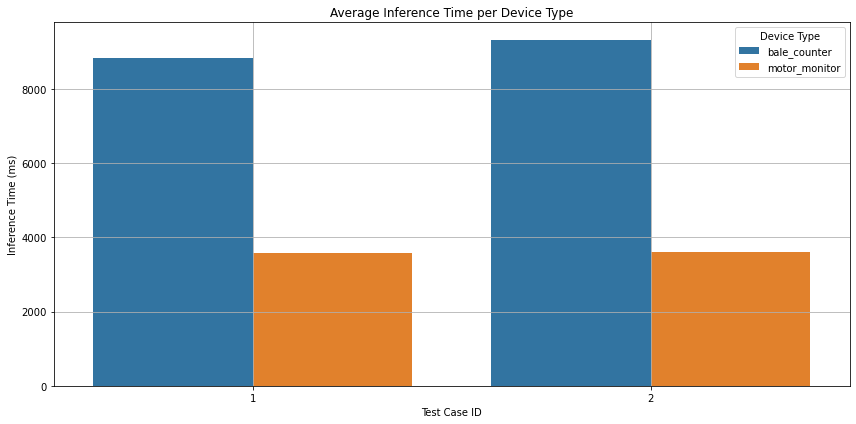

In [3]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='test_case_id', y='inference_time_ms_mean', hue='device_type')
plt.title('Average Inference Time per Device Type')
plt.ylabel('Inference Time (ms)')
plt.xlabel('Test Case ID')
plt.legend(title='Device Type')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📊 CPU and Memory Usage

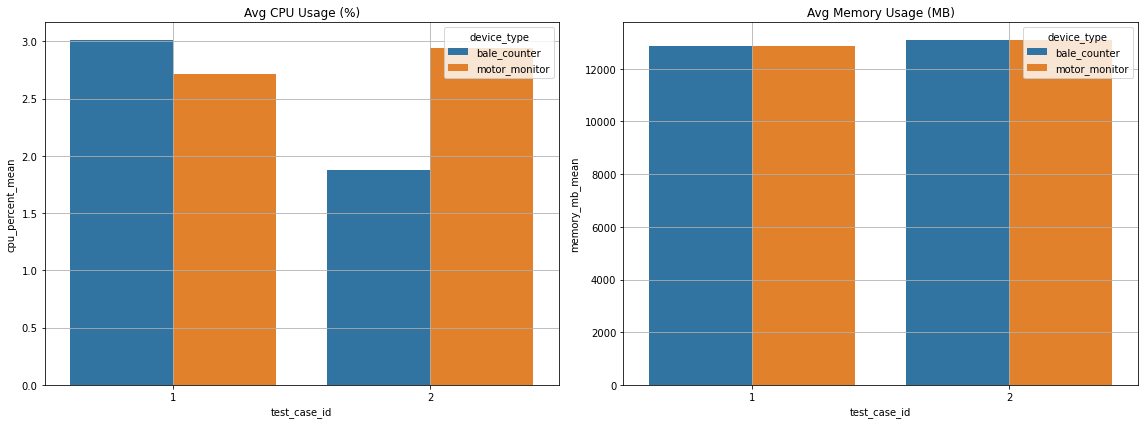

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.barplot(data=grouped, x='test_case_id', y='cpu_percent_mean', hue='device_type', ax=axes[0])
axes[0].set_title('Avg CPU Usage (%)')
axes[0].grid(True)
sns.barplot(data=grouped, x='test_case_id', y='memory_mb_mean', hue='device_type', ax=axes[1])
axes[1].set_title('Avg Memory Usage (MB)')
axes[1].grid(True)
plt.tight_layout()
plt.show()

## 💾 Disk Read/Write

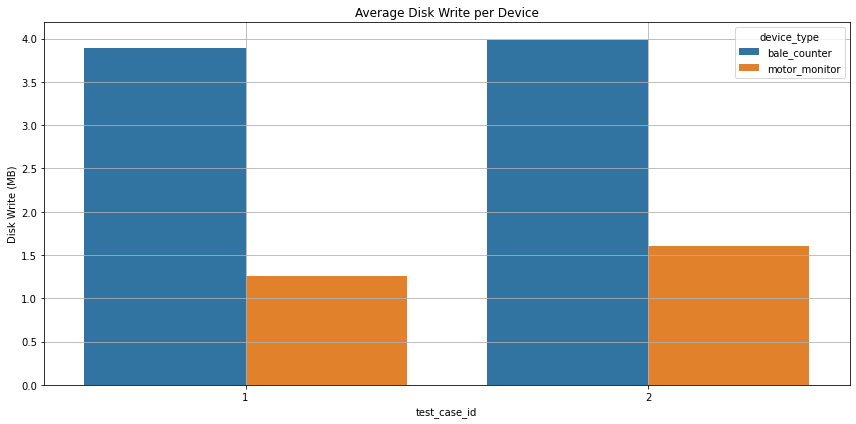

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='test_case_id', y='disk_write_mb_mean', hue='device_type')
plt.title('Average Disk Write per Device')
plt.ylabel('Disk Write (MB)')
plt.grid(True)
plt.tight_layout()
plt.show()